# <center><b1><i>Fish Measurement prediction</i></b1></center>
       

### Predicting(estimate)  weight ,height and width of fish

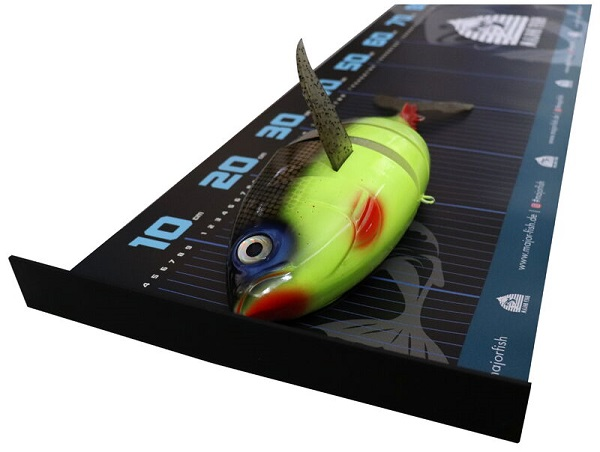

#### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import LinearSVR
from sklearn.model_selection import cross_val_score

In [2]:
df=pd.read_csv('./Fish.csv') # data file reading

### Basic Check

In [3]:
# data loading
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


### Domain Analysis
#### > Species - 7 types of fish species names (Perch,Bream,Roach,Pike,Smelt,Parkki,Whitefish)
#### > Weight of fish
#### > Length of fish here 3 types of length (vertical length, diagonal length, cross length)
#### > Height of the fish 
#### > Width of the fish

In [4]:
df.isnull().sum()  # null value checking

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [5]:
df.info()  # datatypes checking

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [6]:
df.duplicated().sum()  # duplicates checking

0

In [7]:
df.Weight.value_counts()  # weight value counts checking

300.0     6
500.0     5
120.0     5
700.0     5
1000.0    5
         ..
19.7      1
197.0     1
306.0     1
680.0     1
800.0     1
Name: Weight, Length: 101, dtype: int64

In [8]:
df.describe()  #Checking statistical analysis of numerical values 

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


## Insights of Basic Check
 #### > 7 columns and 159 rows are counted in this dataset
 #### > 2 Types of datatypes object and float
 #### > No Duplicates Values in dataset
 #### >Species is Categorical column and 7 types of Species are in the list
 #### >  6 columns are continues data 

##  <CENTER>Exploratory Data Analysis</CENTER>

### Univariate Analysis 

### Histogram

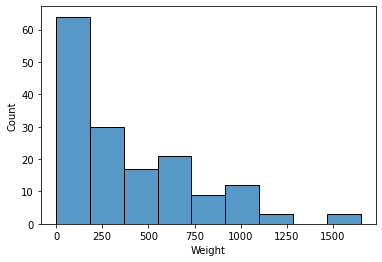

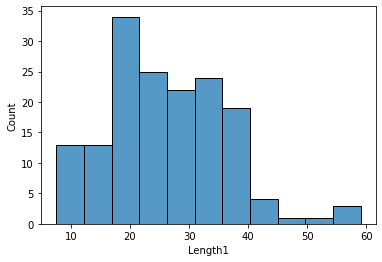

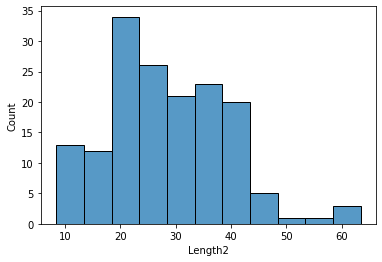

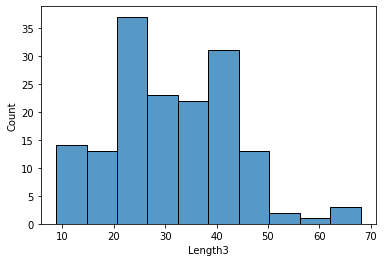

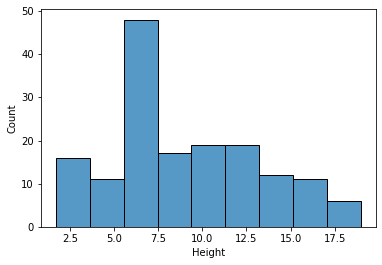

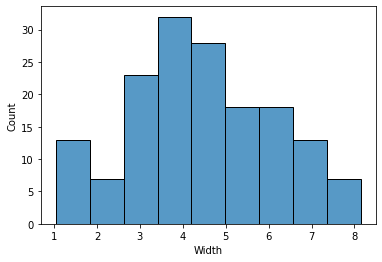

In [9]:
#To check whether it is uniform distribution (freequency) or not
for i in df.columns:
    if df[i].dtypes !='object':
        sns.histplot(x=df[i])
        plt.show();               

### Kde Plot

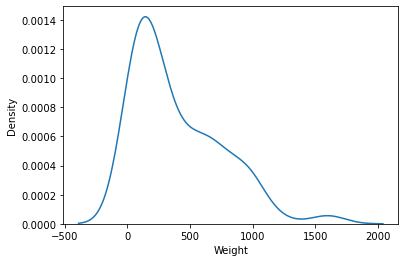

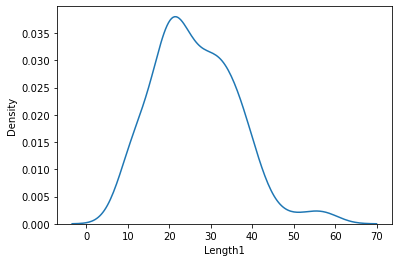

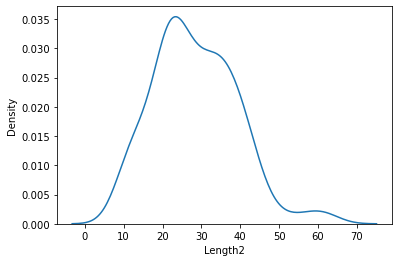

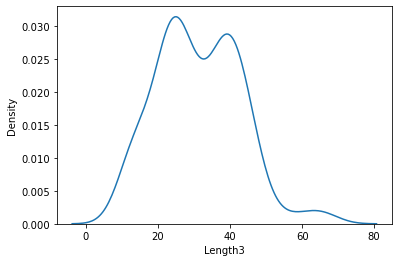

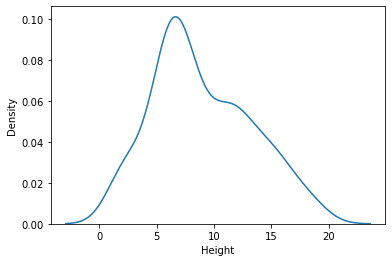

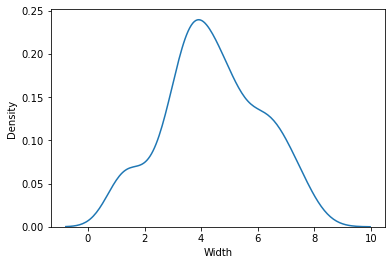

In [10]:
#To check whether it is uniform distribution (Density) or not
for i in df.columns:
    if df[i].dtypes !='object':
        sns.kdeplot(x=df[i])
        plt.show();

### Box Plot

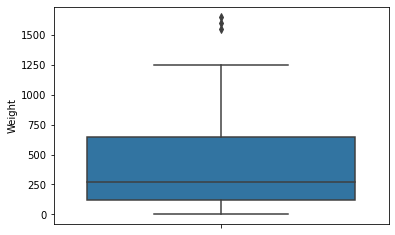

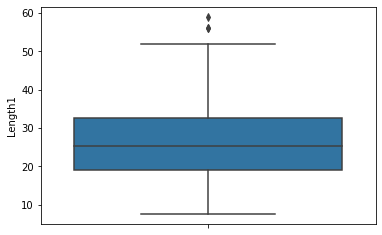

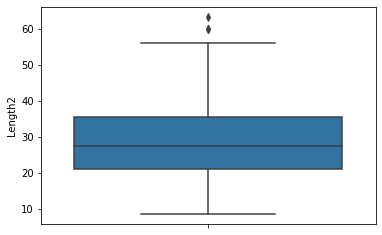

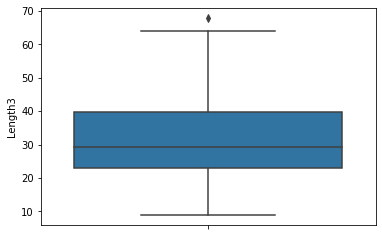

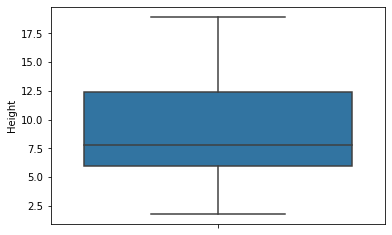

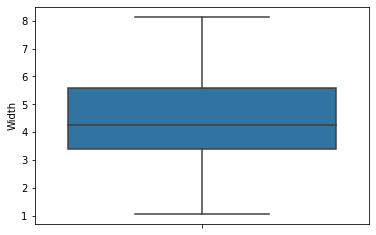

In [11]:
#Shows how the data is distributed and it also shows any outliers
for i in df.columns:
     if df[i].dtypes !='object':
            sns.boxplot(y=df[i])
            plt.show()

### Pie Chart

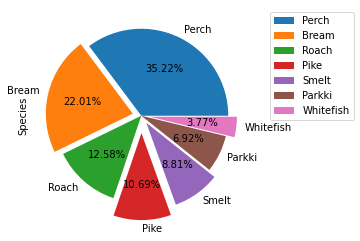

In [12]:
myexplode=[0,0.1,0,0.2,0.1,0,0.1]
x=df.Species.value_counts().plot.pie(autopct="%1.2f%%",explode=myexplode);
plt.legend(bbox_to_anchor=(1.5,1))
plt.show();



### Bivariate Analysis

### Count Plot

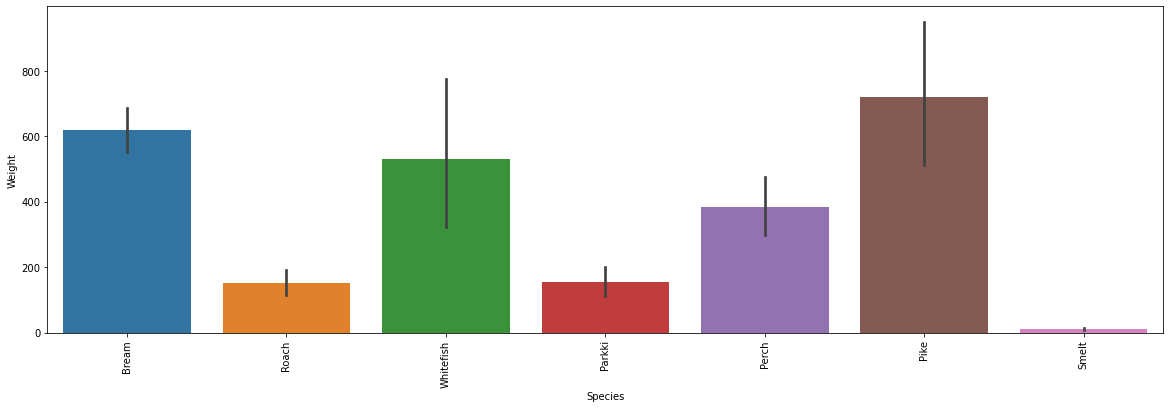

In [13]:
plt.figure(figsize=(20,6))
sns.barplot(x='Species',y="Weight", data=df);
plt.xticks(rotation=90)
plt.show()

### Pair Plot

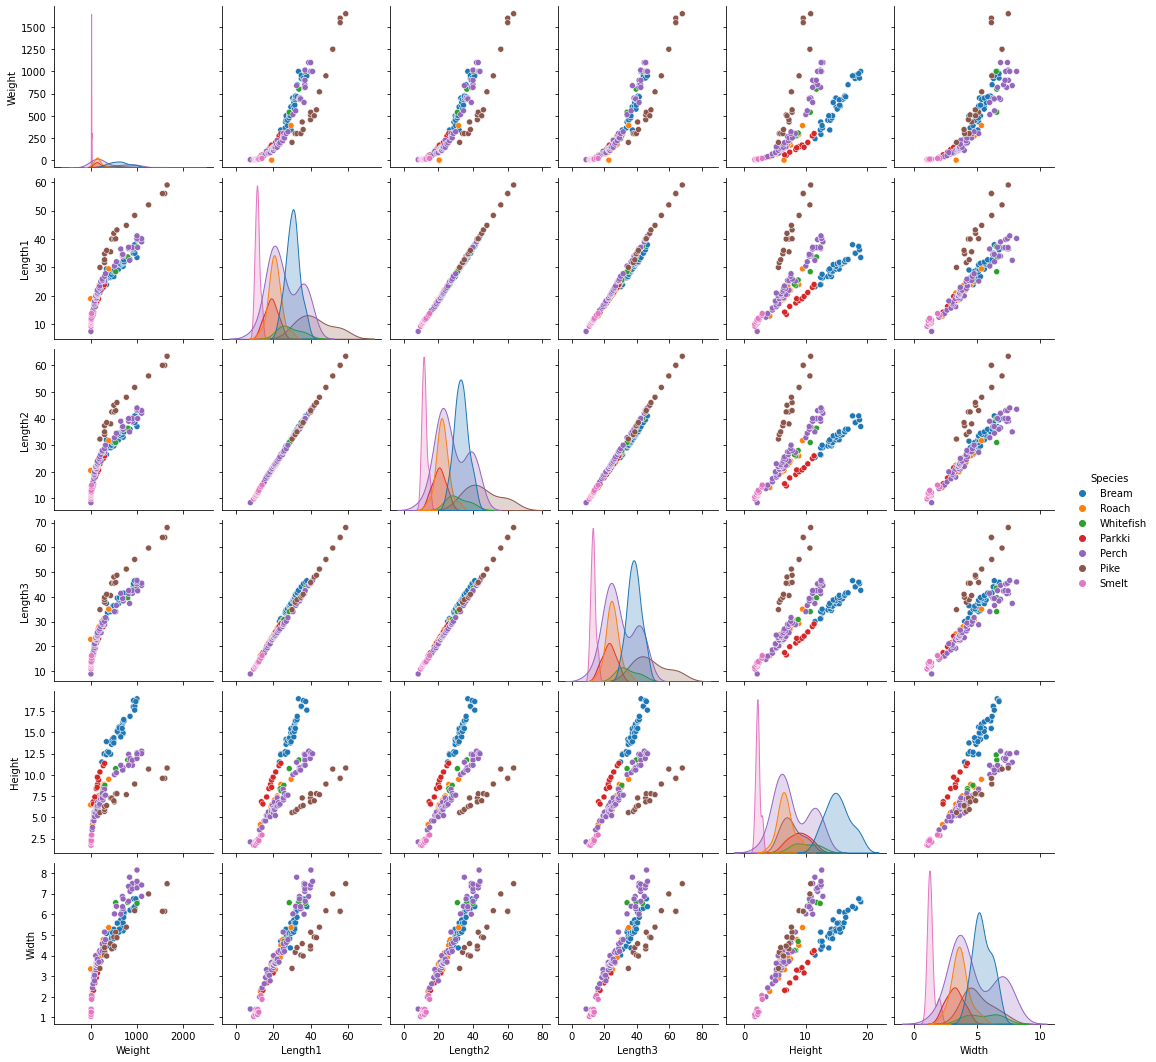

In [14]:
#A pairwise relationships between different  variables in a dataset
sns.pairplot(df, kind='scatter', hue='Species');  

### Heat Map

<AxesSubplot:>

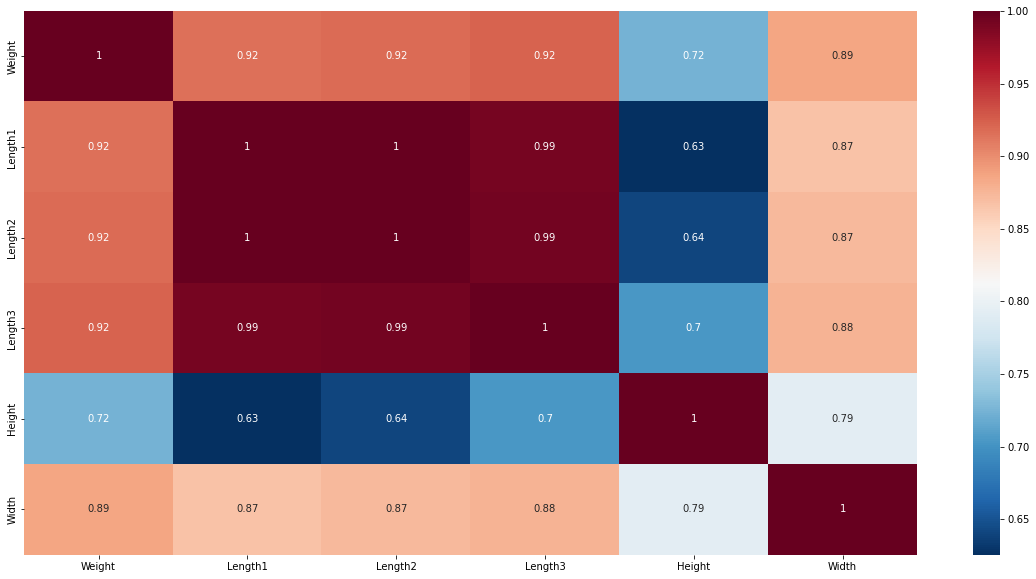

In [15]:
corr=df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True,cmap='RdBu_r')

# Label encoding the categorical columns

In [16]:
#Encoding the categorical data to numerical
le=LabelEncoder()

In [17]:
df['Species']=le.fit_transform(df['Species'])

In [18]:
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,0,290.0,24.0,26.3,31.2,12.4800,4.3056
2,0,340.0,23.9,26.5,31.1,12.3778,4.6961
3,0,363.0,26.3,29.0,33.5,12.7300,4.4555
4,0,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,5,12.2,11.5,12.2,13.4,2.0904,1.3936
155,5,13.4,11.7,12.4,13.5,2.4300,1.2690
156,5,12.2,12.1,13.0,13.8,2.2770,1.2558
157,5,19.7,13.2,14.3,15.2,2.8728,2.0672


### Outlier Treatment

In [19]:
def outlier_limit(col):
    Q3,Q1 = np.nanpercentile(col,[75,25])
    IQR=Q3-Q1
    UL=Q3+1.5*IQR
    LL=Q1-1.5*IQR
    return UL,LL


In [20]:
for column in df.columns:
    if df[column].dtype !="object":
        UL,LL=outlier_limit(df[column])
        df[column] = np.where((df[column]>UL) | (df[column]<LL),np.nan,df[column])

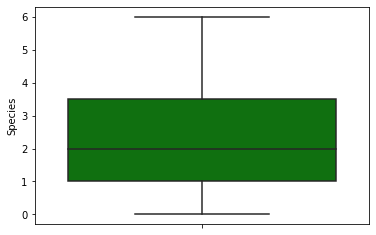

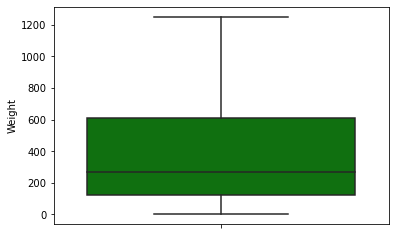

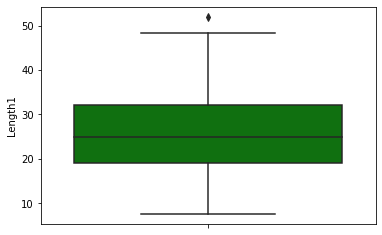

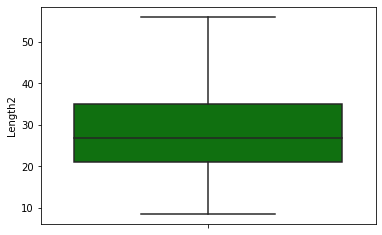

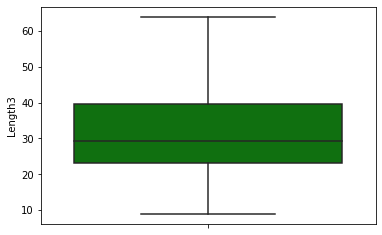

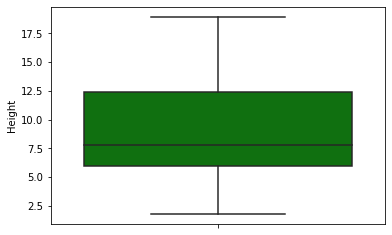

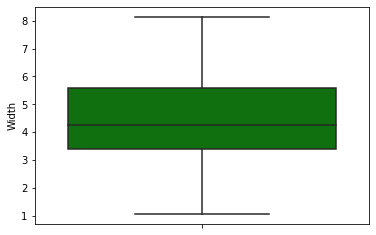

In [21]:
for i in df.columns:
    if df[i].dtype !="object":
        sns.boxplot(y=df[i],color='green')
        plt.show();

In [22]:
df.dropna(inplace=True) # droping null values

In [23]:
df.isnull().sum() # checking null values

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

### Checking the correlation with the target Weight

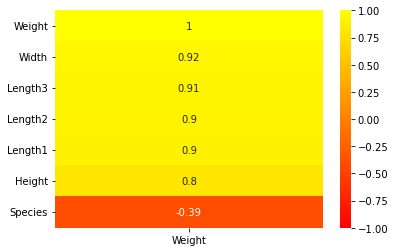

In [24]:
sns.heatmap(df.corr()[["Weight"]].sort_values(by="Weight", ascending=False), vmin=-1, vmax=1, annot=True,cmap="autumn");

   ### Lets take only the columns with good correlation with the target

In [25]:
x=df[['Length1', 'Length2', 'Length3', 'Height',
       'Width']].values 

In [26]:
#Create Y variable with target column
y=df[['Weight']].values 

## Feature Scaling

In [27]:
#At first we will do Feature Scaling to shrink our data values for better result
sc=StandardScaler()

In [28]:
x=sc.fit_transform(x)  

### Model Selection

In [29]:
models={
    "LinearRegression":LinearRegression(),
    "Ridge":Ridge(),
    "LinearSVR":LinearSVR(),
    "DescionTreeRegressor":DecisionTreeRegressor(),
    "GradientBoostRegressor":GradientBoostingRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor(),
    "RandomForestRegressor":RandomForestRegressor()
}

### Checking RMSE

In [30]:
for name, model in models.items():
    scores = cross_val_score(model, x,y, scoring="neg_mean_squared_error",cv=10,n_jobs=-1)
    print("cross validation model : {}".format(name))
    rmse = np.sqrt(-scores)
    rmse_average = np.mean(rmse)
    print("AVERAGE RMSE: ",rmse_average)
    print("*"*100)

cross validation model : LinearRegression
AVERAGE RMSE:  140.26006476442495
****************************************************************************************************
cross validation model : Ridge
AVERAGE RMSE:  139.60919706929295
****************************************************************************************************
cross validation model : LinearSVR
AVERAGE RMSE:  313.7518353054265
****************************************************************************************************
cross validation model : DescionTreeRegressor
AVERAGE RMSE:  110.15061409664891
****************************************************************************************************
cross validation model : GradientBoostRegressor
AVERAGE RMSE:  75.1039915950994
****************************************************************************************************
cross validation model : AdaBoostRegressor
AVERAGE RMSE:  104.50925654845337
*************************************************

In [31]:
#Split the dataset first before ML creating model
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0) 

## Selecting GradientBoostRegressor as it is having best metrics

In [32]:
model=GradientBoostingRegressor() # model selection

In [33]:
model.fit(x_train, y_train) 

GradientBoostingRegressor()

In [34]:
y_pred = model.predict(x)

In [35]:
OUTPUT = pd.DataFrame(zip(y,y_pred), columns=("ACTUAL", "PREDICTION"), dtype=float)

In [36]:
OUTPUT.head() # output dataframe head

,ACTUAL,PREDICTION
0,242.0,258.700500
1,290.0,311.362679
2,340.0,324.308352
3,363.0,364.118943
4,430.0,429.028300


### Scatter Plot

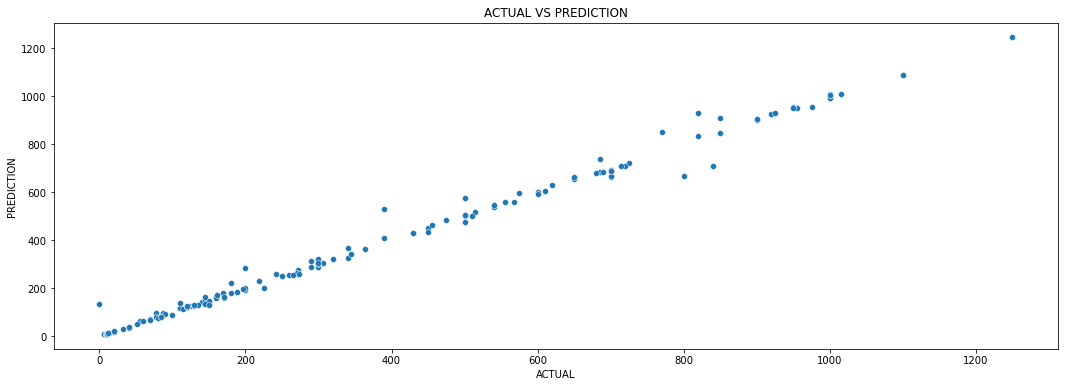

In [37]:
plt.figure(figsize=(18,6))
plt.title("ACTUAL VS PREDICTION")
sns.scatterplot(data=OUTPUT, x="ACTUAL", y="PREDICTION");

### Checking the correlation with the target Height

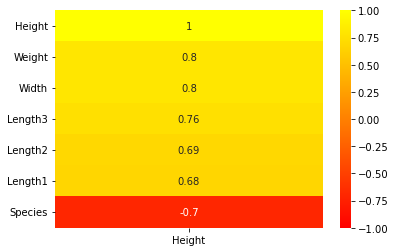

In [38]:
sns.heatmap(df.corr()[["Height"]].sort_values(by="Height", ascending=False), vmin=-1, vmax=1, annot=True,cmap="autumn");

### For Height

In [39]:
x=df[['Length1', 'Length2', 'Length3', 'Weight',
       'Width']].values

In [40]:
y=df[['Height']].values

In [41]:
sc=StandardScaler()

In [42]:
x=sc.fit_transform(x)

In [43]:
models={
    "LinearRegression":LinearRegression(),
    "Ridge":Ridge(),
    "LinearSVR":LinearSVR(),
    "DescionTreeRegressor":DecisionTreeRegressor(),
    "GradientBoostRegressor":GradientBoostingRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor(),
    "RandomForestRegressor":RandomForestRegressor()
}

In [44]:
for name, model in models.items():
    scores = cross_val_score(model, x,y, scoring="neg_mean_squared_error",cv=10,n_jobs=-1)
    print("cross validation model : {}".format(name))
    rmse = np.sqrt(-scores)
    rmse_average = np.mean(rmse)
    print("AVERAGE RMSE: ",rmse_average)
    print("*"*100)

cross validation model : LinearRegression
AVERAGE RMSE:  1.2645698452270548
****************************************************************************************************
cross validation model : Ridge
AVERAGE RMSE:  2.0392897979622164
****************************************************************************************************
cross validation model : LinearSVR
AVERAGE RMSE:  2.846574242291856
****************************************************************************************************
cross validation model : DescionTreeRegressor
AVERAGE RMSE:  2.9028055964761466
****************************************************************************************************
cross validation model : GradientBoostRegressor
AVERAGE RMSE:  2.9459808365580735
****************************************************************************************************
cross validation model : AdaBoostRegressor
AVERAGE RMSE:  3.0562690769976966
***********************************************

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

## Selecting LinearRegression as it is having best metrics

In [46]:
model=LinearRegression()

In [47]:
model.fit(x_train, y_train)

LinearRegression()

In [48]:
y_pred = model.predict(x)

In [49]:
OUTPUT = pd.DataFrame(zip(y,y_pred), columns=("ACTUAL", "PREDICTION"), dtype=float)

In [50]:
OUTPUT.head()

,ACTUAL,PREDICTION
0,11.5200,11.617669
1,12.4800,12.577072
2,12.3778,13.222026
3,12.7300,12.393170
4,12.4440,13.974868


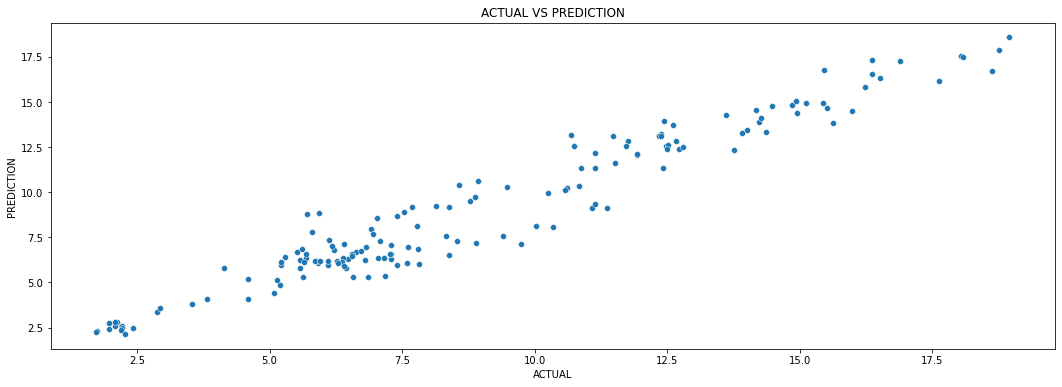

In [51]:
plt.figure(figsize=(18,6))
plt.title("ACTUAL VS PREDICTION")
sns.scatterplot(data=OUTPUT, x="ACTUAL", y="PREDICTION");

### Checking the correlation with the target Width

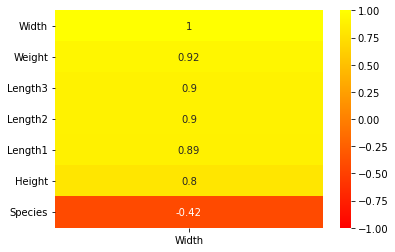

In [52]:
sns.heatmap(df.corr()[["Width"]].sort_values(by="Width", ascending=False), vmin=-1, vmax=1, annot=True,cmap="autumn");

### for Width

In [53]:
x=df[['Length1', 'Length2', 'Length3', 'Weight','Height']].values

In [54]:
y=df[['Width']].values

In [55]:
sc=StandardScaler()

In [56]:
x=sc.fit_transform(x)

In [57]:
models={
    "LinearRegression":LinearRegression(),
    "Ridge":Ridge(),
    "LinearSVR":LinearSVR(),
    "DescionTreeRegressor":DecisionTreeRegressor(),
    "GradientBoostRegressor":GradientBoostingRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor(),
    "RandomForestRegressor":RandomForestRegressor()
}

In [58]:
for name, model in models.items():
    scores = cross_val_score(model, x,y, scoring="neg_mean_squared_error",cv=10,n_jobs=-1)
    print("cross validation model : {}".format(name))
    rmse = np.sqrt(-scores)
    rmse_average = np.mean(rmse)
    print("AVERAGE RMSE: ",rmse_average)
    print("*"*100)

cross validation model : LinearRegression
AVERAGE RMSE:  0.6731926537710443
****************************************************************************************************
cross validation model : Ridge
AVERAGE RMSE:  0.7790336379428655
****************************************************************************************************
cross validation model : LinearSVR
AVERAGE RMSE:  0.7903011497859547
****************************************************************************************************
cross validation model : DescionTreeRegressor
AVERAGE RMSE:  0.5878454047374791
****************************************************************************************************
cross validation model : GradientBoostRegressor
AVERAGE RMSE:  0.5823616784465688
****************************************************************************************************
cross validation model : AdaBoostRegressor
AVERAGE RMSE:  0.575575054815182
***********************************************

In [59]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

## Selecting RandomForestRegressor as it is having best metrics

In [60]:
model=RandomForestRegressor()

In [61]:
model.fit(x_train, y_train)

RandomForestRegressor()

In [62]:
y_pred = model.predict(x)

In [63]:
OUTPUT = pd.DataFrame(zip(y,y_pred), columns=("ACTUAL", "PREDICTION"), dtype=float)

In [64]:
OUTPUT

,ACTUAL,PREDICTION
0,4.0200,4.093874
1,4.3056,4.399958
2,4.6961,4.594489
3,4.4555,4.577152
4,5.1340,4.929268
...,...,...
151,1.3936,1.308428
152,1.2690,1.269140
153,1.2558,1.338386
154,2.0672,2.024946


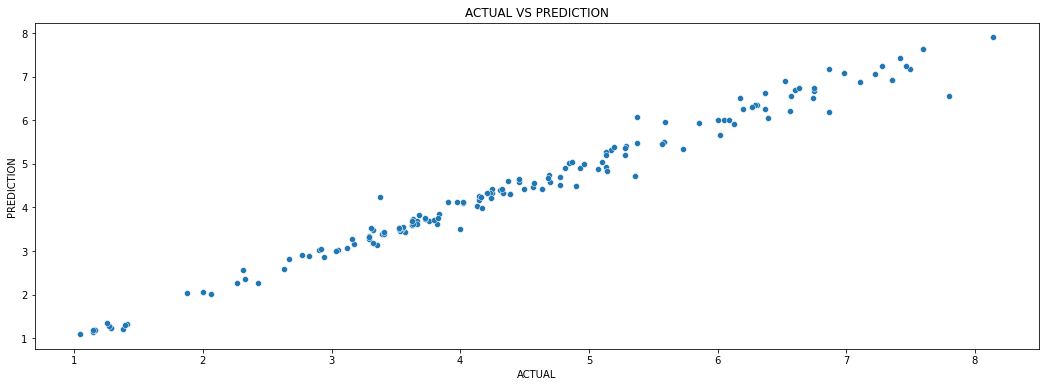

In [65]:
plt.figure(figsize=(18,6))
plt.title("ACTUAL VS PREDICTION")
sns.scatterplot(data=OUTPUT, x="ACTUAL", y="PREDICTION");